# 12 - Solving the Energy Eigenvalue Equation

As a concrete example in how to solve the energy eigenvalue equation numerically, consider the quadratic potential energy,
$$
V(x) = \alpha x^2.
$$
This is just the simple harmonic oscillator potential with $\alpha = m\omega^2 /2$, but let's pretend we don't yet know the energies.

Here's a plot of the potential:

Text(0, 0.5, '$V(x)$')

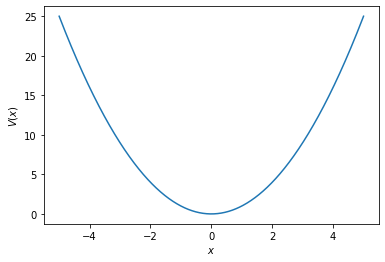

In [61]:
import numpy as np
import matplotlib.pyplot as plt

def V_quad(x):
    alpha = 1
    return alpha * x**2

x = np.linspace(-5, 5, 1000)
V = V_quad(x)

plt.plot(x, V)
plt.xlabel("$x$")
plt.ylabel("$V(x)$")

To solve the energy eigenvalue equation,
$$
-\frac{\hbar^2}{2m} \frac{d^2\phi}{dx^2} + V(x) \phi(x) = E\phi(x),
$$
we'll first re-write it as
$$
\frac{d^2\phi}{dx^2} = -\frac{2m}{\hbar^2} \left[ E - V(x) \right] \phi(x).
$$
Then, to use the simple Euler's method of solving ODEs, we'll define s new variable, which I'll call $\chi(x)$, as
$$
\chi = \frac{d\phi}{dx}.
$$
Then we have two first order differential equations instead of our original second order differential equation:
$$
\frac{d\phi}{dx} = \chi
$$
$$
\frac{d\chi}{dx} = -\frac{2m}{\hbar^2} \left[ E - V(x) \right] \phi(x).
$$

Euler's method begins by supposing that the infintesimal differences ("$d$") can be replaced with small but finite differences ("$\Delta$").  Rearranging a bit gives us our *update equations*:
$$
\phi_{n+1} = \phi_n + \chi_n \Delta x
$$
and
$$
\chi_{n+1} = \chi_n - \frac{2m}{\hbar^2} \left[ E - V(x_n) \right] \phi_n \Delta x.
$$
Notice that we use the previous step's values ($n$) to evaluate the current step ($n+1$).

So, given initial conditions for $\chi$ and $\phi$, we can use the update equations to find the values a little to the right, and then again, and again, and so on.  What are appropriate initial conditions?  We'll start with $x_0 = -\infty$, in which case the wave function $\phi(x)$, we should use *zero*, since it should go to zero at $\pm \infty$:
$$
\phi_0 = \phi(x_0) = \phi(-\infty) = 0
$$
(of course, we won't really use infinity; in practice a reasonably large negative value will work).

One last problem:  we don't know that value of $E$ - fact, that's one of the unknowns in the differential equation.  What do we do?  Well, it starts with a *guess*, but I'll show you what to do from there in a moment.

First, let's define our arrays and constants, and see if we can integrate our equation.

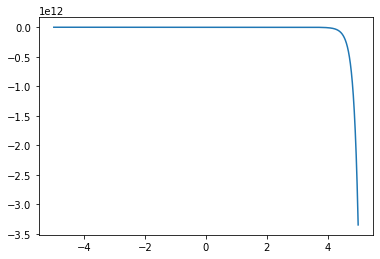

In [104]:
# We'll set some useful parameters first for easy access:
E = 1.0  #  Make that guess at E
x_inf = 5.0  #  Maybe ridiculous but we'll pretend infinity is this
dx = 0.001  #  Step parameter; smaller is better
phi_0 = 0.0  # initial condition for the wave function
chi_0 = 1.0  # initial condition for the derivative of the wave function

# I'll set hbar and m to one; working in SI units isn't advised since the numbers are
# all too small.

# set up arrays
x = np.arange(-x_inf, x_inf, dx)
N = len(x)

phi = np.zeros(N)
chi = np.zeros(N)

# set the initial conditions
phi[0] = phi_0
chi[0] = chi_0

# loop over x
for i in range(N-1):
    phi[i+1] = phi[i] + chi[i] * dx
    chi[i+1] = chi[i] - 2.0 * (E - V_quad(x[i])) * phi[i] * dx
    
# That's it - check our work:
plt.plot(x, phi)

Well, that looks horrible.  But our code is fine; it's actually just the value for $E$ that's messing things up.  Let's look at the plot with more reasonable limits:

(-1000000.0, 4000000.0)

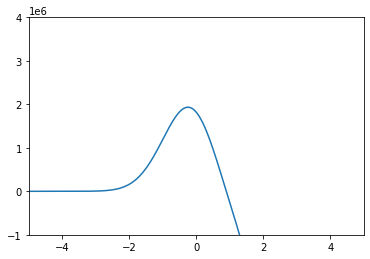

In [105]:
plt.plot(x, phi)
plt.xlim(-5, 5)
plt.ylim(-1e6, 4e6)

So it starts okay but goes to $-\infty$ instead of coming back to zero.  Let's try with a different value of $E$, but I'm going to refactor the code to make that easier.  

(-1000000.0, 4000000.0)

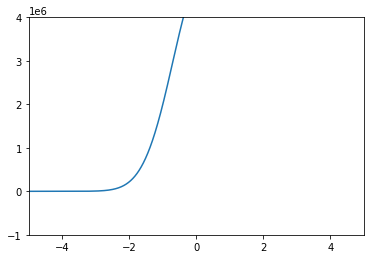

In [106]:
def solve_energy_eigenvalue(E, x_inf = 5.0, dx = 0.001, phi_0 = 0.0, chi_0 = 1.0, V = V_quad):
    
    x = np.arange(-x_inf, x_inf, dx)
    N = len(x)

    phi = np.zeros(N)
    chi = np.zeros(N)

    # set the initial conditions
    phi[0] = phi_0
    chi[0] = chi_0

    # loop over x
    for i in range(N-1):
        phi[i+1] = phi[i] + chi[i] * dx
        chi[i+1] = chi[i] - 2.0 * (E - V(x[i])) * phi[i] * dx

    return x, phi, chi

x, phi, chi = solve_energy_eigenvalue(0.5)

plt.plot(x, phi)
plt.xlim(-5, 5)
plt.ylim(-1e6, 4e6)

Oh no, now we have the opposite problem - the wave function is going to $+\infty$!  Luckily, that means that correct value of E is between 0.5 and 1.0.  So let's try a few more:

(-1000000.0, 4000000.0)

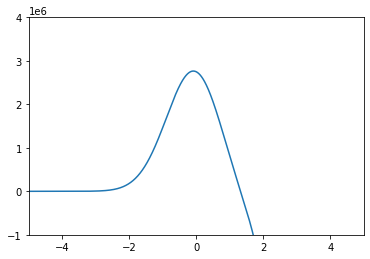

In [107]:
x, phi, chi = solve_energy_eigenvalue(0.8)

plt.plot(x, phi)
plt.xlim(-5, 5)
plt.ylim(-1e6, 4e6)

Now it's going to $-\infty$!

(-1000000.0, 4000000.0)

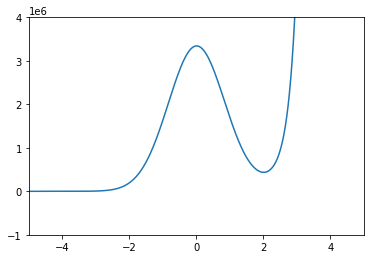

In [108]:
x, phi, chi = solve_energy_eigenvalue(0.7)

plt.plot(x, phi)
plt.xlim(-5, 5)
plt.ylim(-1e6, 4e6)

So now we know the correct value is between 0.7 and 0.8.  Some more trial and error can get us the correct value to our desired precision (whatever that may be).

(-1000000.0, 4000000.0)

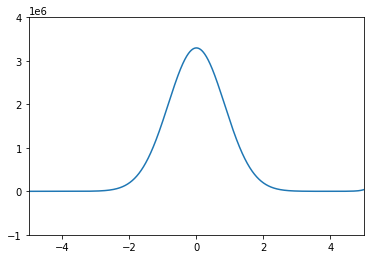

In [109]:
x, phi, chi = solve_energy_eigenvalue(0.70710703)

plt.plot(x, phi)
plt.xlim(-5, 5)
plt.ylim(-1e6, 4e6)

So, there's our wave function $\phi_1(x)$ (unnormalized, but that's fine for now), and our energy (in our units where $\alpha = \hbar = m = 1$) is 
$$
E_1 = 0.7071
$$

Although it's tedious, we can also find our next energy and wave function in the same way, and so on up the ladder.  Let's do the first three for fun:

(-5.0, 5.0, 0.0, 6.0)

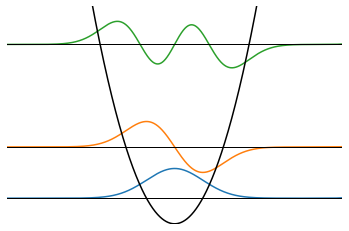

In [135]:
# get the ground state again
E1 = 0.70710703
x, phi1, chi1 = solve_energy_eigenvalue(E1)

# get the first excited state
E2 = 2.1213226
x, phi2, chi2 = solve_energy_eigenvalue(E2)

# get the second excited state
E3 = 4.94976
x, phi3, chi3 = solve_energy_eigenvalue(E3)

# I'd really like to normalize these
def normalize(x, phi):
    A2 = np.trapz(phi**2, x)
    return x, phi / np.sqrt(A2)

x, phi1 = normalize(x, phi1)
x, phi2 = normalize(x, phi2)
x, phi3 = normalize(x, phi3)

plt.plot(x, phi1 + E1)
plt.plot(x, phi2 + E2)
plt.plot(x, phi3 + E3)

plt.axhline(E1, color="black", lw=1)
plt.axhline(E2, color="black", lw=1)
plt.axhline(E3, color="black", lw=1)

plt.xlabel("$x$")
plt.ylabel("$\phi(x)$")

plt.plot(x, V_quad(x), color="black")
plt.xlim(-5, 5)
plt.ylim(0, 6)

plt.axis('off')